<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/cifar100_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar100 Convnets

##Import

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import cifar100
from keras import regularizers, optimizers, models, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

##Dataset

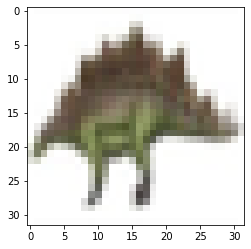

In [2]:
# DATASET & PREPROCESSING - Cifar100
# 50,000 32x32 color training images and 10,000 test images
# labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Show img example
img = x_train[1]
plt.imshow(img)

# Processing data
x_train = x_train.astype("float32") / 255
y_train = keras.utils.to_categorical(y_train)
x_test = x_test.astype("float32") / 255
y_test = keras.utils.to_categorical(y_test)

batch_size = 64

# Data augmentation to generates img variation
data_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            validation_split=0.2,
            horizontal_flip=True,
            featurewise_center=True,
            width_shift_range=0.1)

data_gen.fit(x_train)

# train and validation data generators
train_data_gen = data_gen.flow(x_train, y_train, 
                               batch_size=batch_size, 
                               subset="training", 
                               shuffle=True)

validation_data_gen = data_gen.flow(x_train, y_train, 
                               batch_size=batch_size,
                               shuffle=False,
                               subset="validation")


##Model

In [3]:
# MODEL DEFINITION - model should predict the class of a given img

model = keras.Sequential()

# Convnets1
model.add(layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Dropout(0.2))

# Convnets2
model.add(layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Dropout(0.5))

# Convnets3
model.add(layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Dropout(0.5))

# Flatten
model.add(layers.Flatten())

# Dense1
model.add(layers.Dense(units=1000, activation="relu"))
model.add(layers.Dropout(0.5))

# Dense2
model.add(layers.Dense(units=1000, activation="relu"))
model.add(layers.Dropout(0.5))

# Output
model.add(layers.Dense(units=100, activation="softmax"))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=["acc"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       590080    
                                                        

##Training

In [4]:
# CALLBACK - Control iterations and save the best model possible

# Stop iterations regarding to accuracy value
early_stop = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=20)

# Saving model at each epoch if values are better than the previous one
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)


In [6]:
# TRAINING

epochs = 150
history = model.fit(
    train_data_gen,
    validation_data=validation_data_gen,
    callbacks=[model_checkpoint],
    epochs=epochs, 
    batch_size=batch_size)

Epoch 1/150
625/625 [==============================] - ETA: 0s - loss: 4.5081 - acc: 0.0162
Epoch 1: val_acc improved from -inf to 0.02350, saving model to best_model.h5
625/625 [==============================] - 36s 57ms/step - loss: 4.5081 - acc: 0.0162 - val_loss: 4.3572 - val_acc: 0.0235
Epoch 2/150
625/625 [==============================] - ETA: 0s - loss: 4.2457 - acc: 0.0385
Epoch 2: val_acc improved from 0.02350 to 0.08190, saving model to best_model.h5
625/625 [==============================] - 35s 56ms/step - loss: 4.2457 - acc: 0.0385 - val_loss: 3.9968 - val_acc: 0.0819
Epoch 3/150
625/625 [==============================] - ETA: 0s - loss: 3.9261 - acc: 0.0822
Epoch 3: val_acc improved from 0.08190 to 0.12780, saving model to best_model.h5
625/625 [==============================] - 38s 60ms/step - loss: 3.9261 - acc: 0.0822 - val_loss: 3.6715 - val_acc: 0.1278
Epoch 4/150
625/625 [==============================] - ETA: 0s - loss: 3.6902 - acc: 0.1208
Epoch 4: val_acc improv

##Results

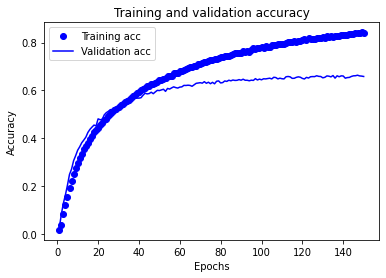

In [8]:
# LOG ACCURACY RESULTS

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, acc_values, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

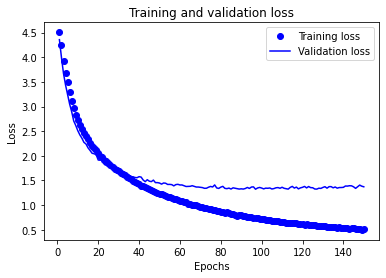

In [9]:
# LOG LOSS RESULTS

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+ 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# EVALUATION

loss, acc = model.evaluate(x_test, y_test)
print("Accuracy is about {}%".format(round(acc * 100, 2)))


313/313 [==============================] - 3s 8ms/step - loss: 2.1341 - acc: 0.4985
Accuracy is about 49.85%
